In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import signal
from time import sleep
import sys

#setup some constants and parameters
M=2**21
tsim=7e-12
eps0 = 8.854187e-12
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
hdk=hbar/kb
deltap = np.sqrt(1/3/eps0/hbar/c)*kb
T=50000

#define square root of Dn function
def Dnsqt(wla,T):
    return np.sqrt(6*hdk**2*wla/(np.exp(hdk*wla/T)-1)/T**2/np.pi)

#generate an array of the square root of Dn function
Dsqt = []
for n in range(1,M):
    Dsqt.append(Dnsqt(abs(2*np.pi*n/tsim),T))

#define how many times to run to average the results
Ncomp=5

#define the starting sum of the result
Efsum= np.zeros(2*M)

for i in range(Ncomp):
    
    #generate random numbers
    M0 = np.random.normal(0,1)
    Mlp = np.random.normal(0,1,M-1)
    Nlp = np.random.normal(0,1,M-1)
    MM = np.random.normal(0,1)
    
    #generate the array of the fourier transform of E field, we generate l=0 and l=-M separately. 
    #for l=1 to M-1 and l=-1 to -(M-1) are conjutated to each other. 
    #we contruct the whole array by gluing them together by the order from l=0 -> l=M-1 -> l=-M -> l=-(m-1) -> l=-1
    Ef0 = np.array([M0*np.sqrt(6*hdk/np.pi/T)])
    Eflp = np.multiply((Mlp + 1j*Nlp), Dsqt)
    Eflm = np.flip(np.conjugate(Eflp))
    EfM = np.array([MM*Dnsqt(abs(2*np.pi*M/tsim),T)])
    Ef = np.hstack((Ef0,Eflp,EfM,Eflm))
    
    #we normalize Ef and compute its inverse fast fourier transform
    Efn = deltap*T/np.sqrt(tsim)*Ef
    En = np.fft.ifft(Efn)
    
    #we compute self correlation of En
    Eautoc = signal.correlate(En,En)
    Eautocf = np.fft.fft(Eautoc[len(En)-1:])
    
    #extract the real value and add the value of this loop to the total sum
    Eautocf = np.real(Eautocf)
    Efsum += Eautocf
    
    #generate some feedback to check the progress of the loop
    x = i/Ncomp*100
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('😁'*int(x), int(x)))
    sys.stdout.flush()
    sleep(0.0001)

#average the final result
Efavg = Efsum/Ncomp

#save data to some file or reload file to write more data on it
#np.savez("Efavg_v5.npz", Efavg_50000 = Efavg)
#data = np.load("Efavg_v5.npz")
#data = dict(data)
#data["Efavg_50000"] = Efavg
#np.savez("Efavg_v5.npz",**data)




[😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁😁] 80%

Text(0, 0.5, 'Magnitude')

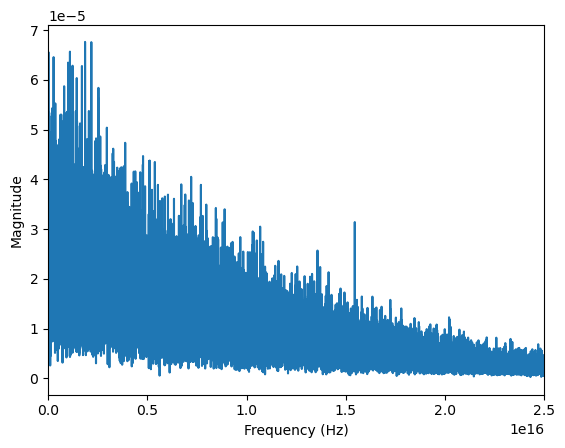

In [5]:
freqs = np.linspace(0,2*M*2*np.pi/(7e-12),M*2)
plt.plot(freqs,Efavg)
plt.xlim(0,25e15)
#plt.ylim(0,8*1e-28)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

/home/311514089/anaconda3/envs/mp/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Electric field source Es')

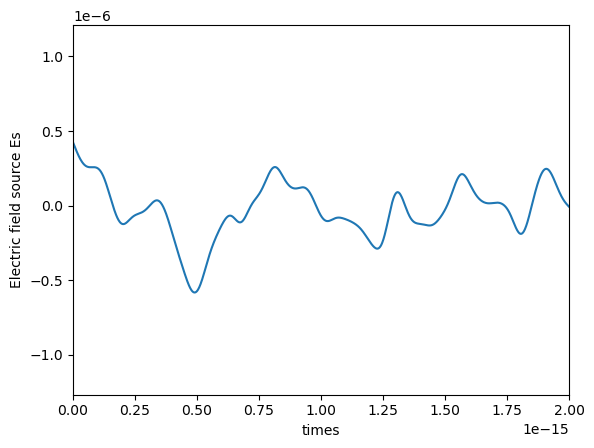

In [4]:
timess = np.linspace(0,7*1e-12,2*M)
plt.plot(timess,En)
plt.xlim(0,2e-15)
#plt.ylim(-1,1)
plt.xlabel('times')
plt.ylabel('Electric field source Es')

Text(0, 0.5, 'Correlation function')

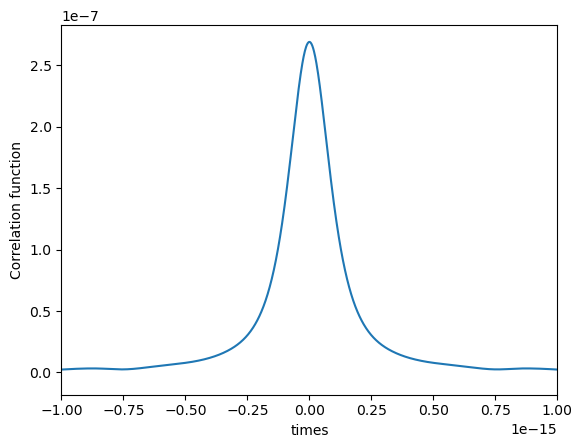

In [5]:
timesss = np.linspace(-7*1e-12,7e-12,M*4-1)
plt.plot(timesss,Eautoc)
plt.xlim(-1e-15,1e-15)
#plt.ylim(0,3*0.2)
plt.xlabel('times')
plt.ylabel('Correlation function')